In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

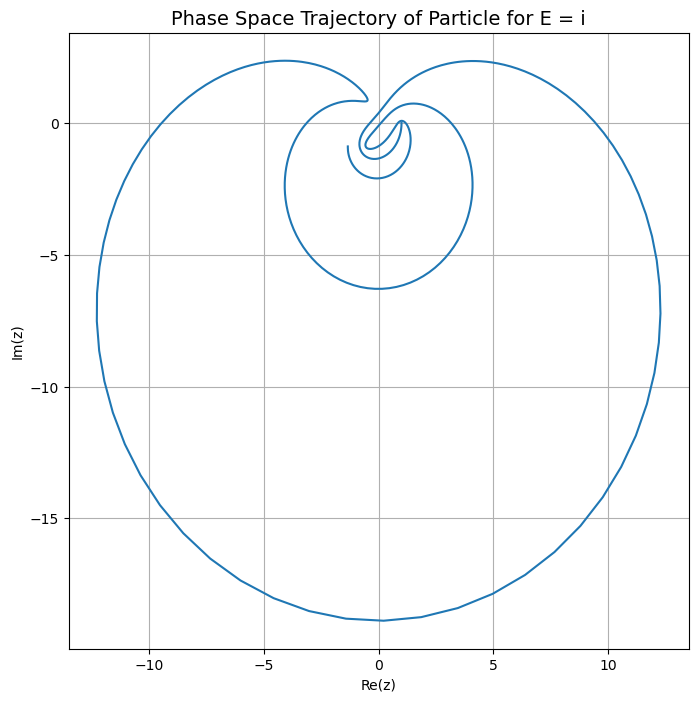

In [2]:
# Define the system of ODEs
def dSdt(S, t):
    x, y, a, b = S  # S = [Re(z), Im(z), Re(p), Im(p)]
    dxdt = 2 * a  # Real part of \dot{z}
    dydt = 2 * b  # Imaginary part of \dot{z}
    dadt = 6 * x * y # Real part of \dot{p}
    dbdt = -3 * (x**2 - y**2) # Imaginary part of \dot{p}
    return [dxdt, dydt, dadt, dbdt]


# Initial conditions (z = 1 + 0i, p = 0 + 0i: This gives trajectories for E = i)
S0 = [1.0, 0.0, 0.0, 0.0]

# Time points from 0 to 10 with 1000 steps
t = np.linspace(0, 10, 1000)

# Solve the ODE
sol = odeint(dSdt, S0, t)

# Extract solutions
x = sol[:, 0]
y = sol[:, 1]
a = sol[:, 2]
b = sol[:, 3]

# Phase space plot of z(t)
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Phase Space Trajectory of Particle for E = i', fontsize=14)
plt.grid(True)
plt.show()

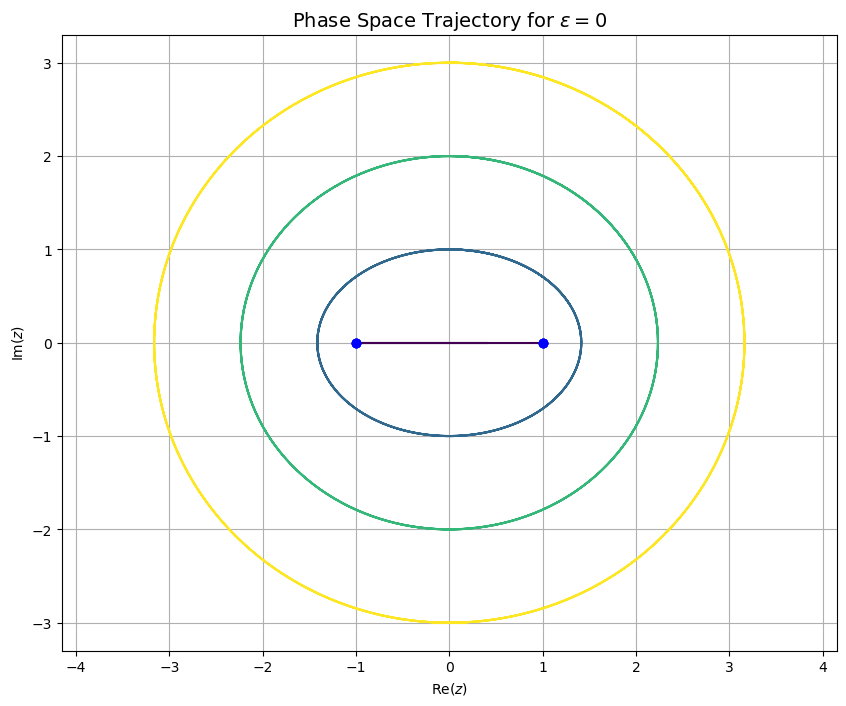

In [3]:
# Define the ODE system (real and imaginary parts)
def dydt(t, y):
    x, y, u, w = y  # y = [Re(z), Im(z), Re(\dot{z}), Im(\dot{z})]
    dxdt = u  # Real part of \dot{z}
    dydt = w  # Imaginary part of \dot{z}
    dudt = - 4*x # Re(\ddot{z}) = -x
    dwdt = - 4*y # Im(\ddot{z}) = -y
    return [dxdt, dydt, dudt, dwdt]

# Define initial conditions (all satisfying E = 1)
initial_conditions = [
    {"z0": 1.0, "v0": 0.0},  # IC1: z(0)=1, \dot{z}(0)=0 (turning point)
    {"z0": 1.0j, "v0": 2*np.sqrt(2)}, # IC2: z(0)=i, v(0)=\sqrt{2}
    {"z0": 2.0j, "v0": np.sqrt(20)},  # IC3: z(0)=2i, v(0)=\sqrt{20}
    {"z0": 3.0j, "v0": np.sqrt(40)},  # IC4: z(0)=3i, v(0)=\sqrt{20}
]

# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Solve for each IC and store trajectories
solutions = []
for ic in initial_conditions:
    z0 = ic["z0"]
    v0 = ic["v0"]
    y0 = [np.real(z0), np.imag(z0), np.real(v0), np.imag(v0)]
    sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)
    solutions.append(sol)

# Plot phase space (Re(z) vs Im(z)) for all trajectories
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

for i, sol in enumerate(solutions):
    x = sol.y[0]  # Re(z)
    y = sol.y[1]  # Im(z)
    plt.plot(x, y, color=colors[i])
    plt.plot(1, 0, 'bo')  # Turning point
    plt.plot(-1, 0, 'bo')  # Turning point

plt.xlabel('Re($z$)')
plt.ylabel('Im($z$)')
plt.title('Phase Space Trajectory for $\epsilon = 0$', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.show()


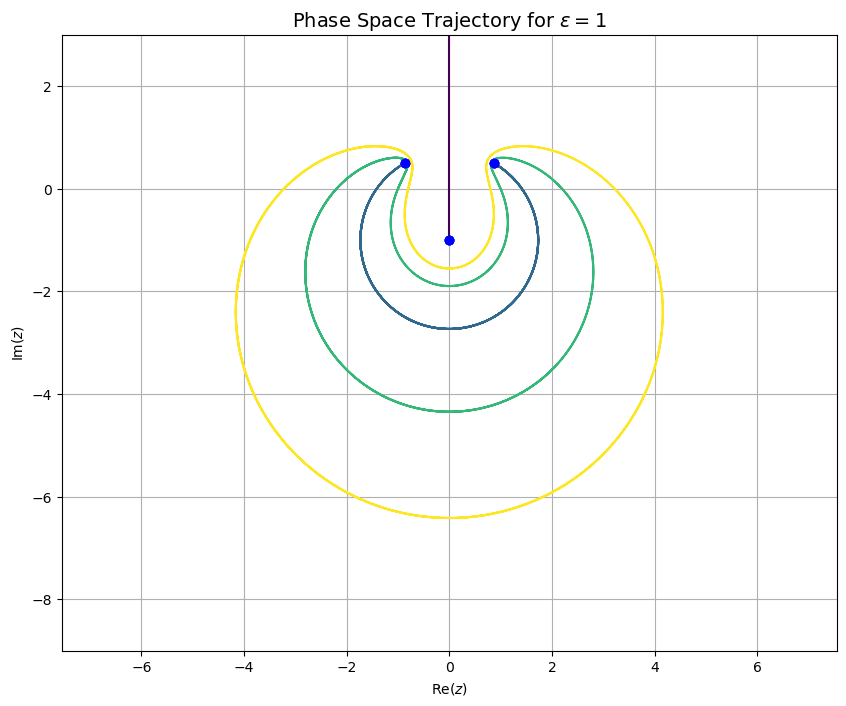

In [4]:
# Define the ODE system (real and imaginary parts)
def dydt(t, y):
    x, y, u, w = y  # y = [Re(z), Im(z), Re(\dot{z}), Im(\dot{z})]
    dxdt = u  # Real part of \dot{z}
    dydt = w  # Imaginary part of \dot{z}
    dudt = 12 * x * y # Re(\ddot{z}) = 12*x*y 
    dwdt = -6 * (x**2 - y**2)  # Im(\ddot{z}) = -6(x**2 - y**2)
    return [dxdt, dydt, dudt, dwdt]

# Define initial conditions (all satisfying E = 1)
initial_conditions = [
    {"z0": -1.0j, "v0": 0.0},      
    {"z0": 0.5 * np.sqrt(3) + 0.5j, "v0": 0},  
    {"z0": -1.0, "v0": 2*(np.sqrt(-1 + 1.0j))}, 
    {"z0": -0.8, "v0": 2*(0.248447 + 1.0304j)},
]

# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Solve for each IC and store trajectories
solutions = []
for ic in initial_conditions:
    z0 = ic["z0"]
    v0 = ic["v0"]
    y0 = [np.real(z0), np.imag(z0), np.real(v0), np.imag(v0)]
    sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)
    solutions.append(sol)

# Plot phase space (Re(z) vs Im(z)) for all trajectories
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

for i, sol in enumerate(solutions):
    x = sol.y[0]  # Re(z)
    y = sol.y[1]  # Im(z)
    plt.plot(x, y, color=colors[i])
    plt.plot(0, -1, 'bo')  # Turning point
    plt.plot(0.5*np.sqrt(3), 0.5, 'bo')  # Turning point
    plt.plot(-0.5*np.sqrt(3), 0.5, 'bo')  # Turning point

plt.xlabel('Re($z$)')
plt.ylabel('Im($z$)')
plt.title('Phase Space Trajectory for $\epsilon = 1$', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.ylim(-9, 3)
plt.show()


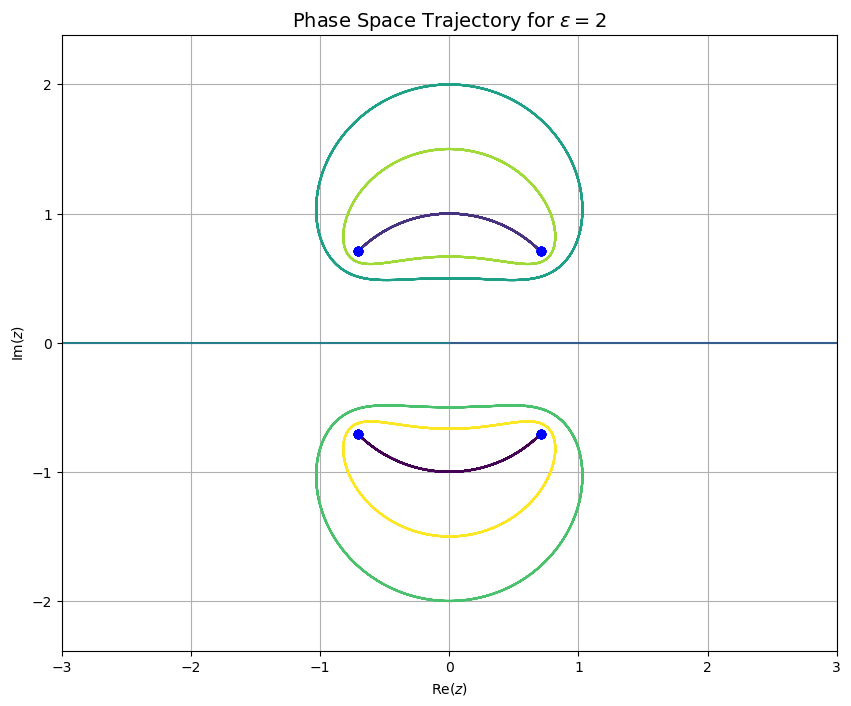

In [5]:
# Define the ODE system (real and imaginary parts)
def dydt(t, state):
    x, y, u, w = state  # state = [Re(z), Im(z), Re(dot{z}), Im(dot{z})]
    dxdt = u  # Re(dot{z})
    dydt = w  # Im(dot{z})
    dudt = 8 * x * (x**2 - 3 * y**2)  # Re(ddot{z})
    dwdt = 8 * y * (3 * x**2 - y**2)  # Im(ddot{z})
    return [dxdt, dydt, dudt, dwdt]

# Define initial conditions (all satisfying E = 1)
initial_conditions = [
    {"z0": -(1.0 + 1.0j)/np.sqrt(2), "v0": 0.0},  # Turning point 1
    {"z0": -(1.0 - 1.0j)/np.sqrt(2), "v0": 0.0},  # Turning point 2
    {"z0": 0, "v0": 1.0},  
    {"z0": 0, "v0": -1.0}, 
    {"z0": 0.5j, "v0": 2*1.0307764064044151374553524639935192562867998063434051085996583932737},             
    {"z0": -0.5j, "v0": 2*1.0307764064044151374553524639935192562867998063434051085996583932737},          
    {"z0": 1.5j, "v0": 2*2.4622144504490261804365528537294061204240340718606910429307886324591},      
    {"z0": -1.5j, "v0": 2*2.4622144504490261804365528537294061204240340718606910429307886324591},   
]


# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Solve for each IC and store trajectories
solutions = []
for ic in initial_conditions:
    z0 = ic["z0"]
    v0 = ic["v0"]
    y0 = [np.real(z0), np.imag(z0), np.real(v0), np.imag(v0)]
    sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)
    solutions.append(sol)

# Plot phase space (Re(z) vs Im(z)) for all trajectories
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

for i, sol in enumerate(solutions):
    x = sol.y[0]  # Re(z)
    y = sol.y[1]  # Im(z)
    plt.plot(x, y, color=colors[i])
    plt.plot(-1/np.sqrt(2), 1/np.sqrt(2), 'bo')  # Turning point
    plt.plot(1/np.sqrt(2), 1/np.sqrt(2), 'bo')  # Turning point
    plt.plot(1/np.sqrt(2), -1/np.sqrt(2), 'bo')  # Turning point
    plt.plot(-1/np.sqrt(2), -1/np.sqrt(2), 'bo')  # Turning point


plt.xlabel('Re($z$)')
plt.ylabel('Im($z$)')
plt.title('Phase Space Trajectory for $\epsilon = 2$', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.xlim(-3, 3)
plt.show()

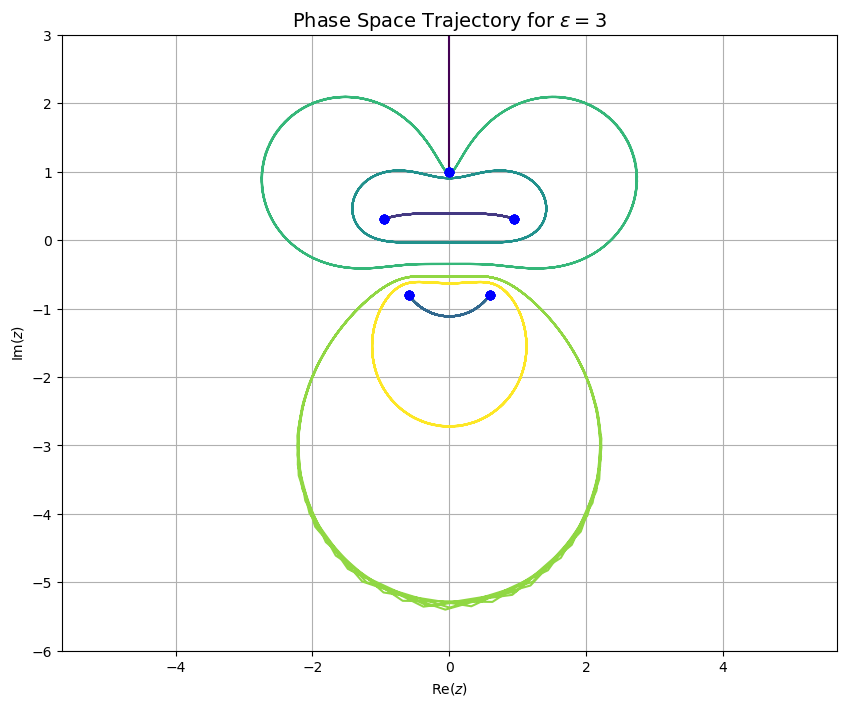

In [6]:
# Define the ODE system (real and imaginary parts)
def dydt(t, state):
    x, y, u, w = state  # state = [Re(z), Im(z), Re(dot{z}), Im(dot{z})]
    dxdt = u  # Re(dot{z})
    dydt = w  # Im(dot{z})
    dudt = 40*x*y*(-x**2 + y**2)  # Re(ddot{z})
    dwdt = 10*x**4 - 60*x**2*y**2 + 10*y**4  # Im(ddot{z})
    return [dxdt, dydt, dudt, dwdt]

# Define initial conditions (all satisfying E = 1)
initial_conditions = [
    {"z0": 1.0j, "v0": 0.0},  # Turning point 1
    {"z0": np.sqrt(5/8 + np.sqrt(5)/8) + (0.0 + 1.0j)* (np.sqrt(5)/4 - 1/4), "v0": 0.0},  # Turning point 2
    {"z0": np.sqrt(5/8 - np.sqrt(5)/8) + (0.0 + 1.0j) *(-np.sqrt(5)/4 - 1/4), "v0": 0.0},  # Turning point 3
    {"z0": 1.0, "v0": 2*np.sqrt(2+1.0j)}, 
    {"z0": -2.0+2.0j, "v0": 2*np.sqrt(129+128.0j)}, 
    {"z0": -2.0-2.0j, "v0": 2*np.sqrt(-127+128.0j)},
    {"z0": -1.0-1.0j, "v0": 2*(1.0+2.0j)},
]


# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Solve for each IC and store trajectories
solutions = []
for ic in initial_conditions:
    z0 = ic["z0"]
    v0 = ic["v0"]
    y0 = [np.real(z0), np.imag(z0), np.real(v0), np.imag(v0)]
    sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)
    solutions.append(sol)

# Plot phase space (Re(z) vs Im(z)) for all trajectories
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

for i, sol in enumerate(solutions):
    x = sol.y[0]  # Re(z)
    y = sol.y[1]  # Im(z)
    plt.plot(x, y, color=colors[i])
    plt.plot(0, 1, 'bo')  # Turning point
    plt.plot(np.sqrt(5/8 + np.sqrt(5)/8), np.sqrt(5)/4 - 1/4, 'bo')  # Turning point
    plt.plot(-np.sqrt(5/8 - np.sqrt(5)/8), -np.sqrt(5)/4 - 1/4, 'bo')  # Turning point
    plt.plot(np.sqrt(5/8 - np.sqrt(5)/8), -np.sqrt(5)/4 - 1/4, 'bo')  # Turning point
    plt.plot(-np.sqrt(5/8 + np.sqrt(5)/8), np.sqrt(5)/4 - 1/4, 'bo')  # Turning point


plt.xlabel('Re($z$)')
plt.ylabel('Im($z$)')
plt.title('Phase Space Trajectory for $\epsilon = 3$', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.ylim(-6, 3)
plt.show()

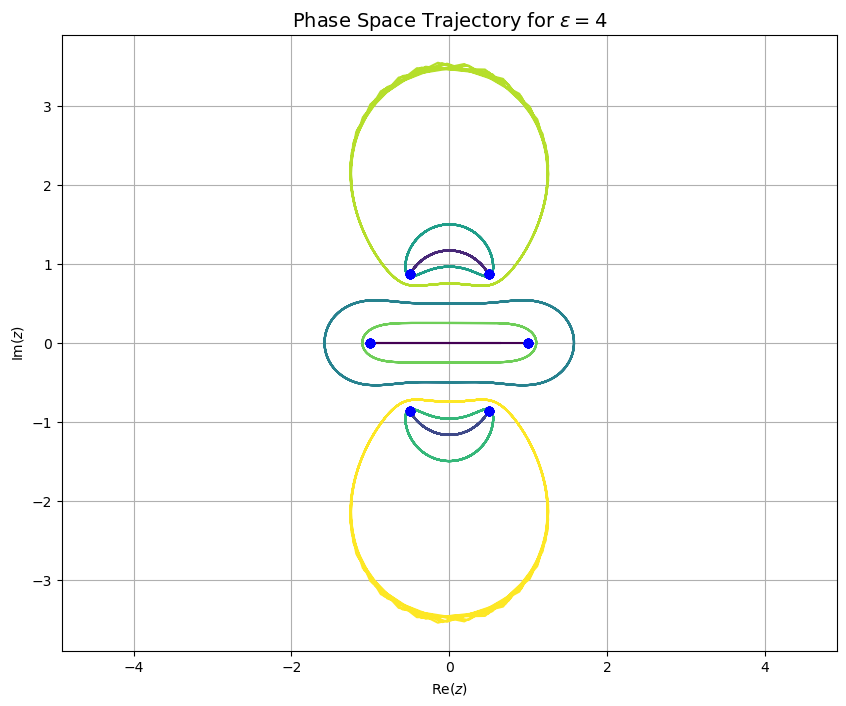

In [8]:
# Define the ODE system (real and imaginary parts)
def dydt(t, state):
    x, y, u, w = state  # state = [Re(z), Im(z), Re(dot{z}), Im(dot{z})]
    dxdt = u  # Re(dot{z})
    dydt = w  # Im(dot{z})
    dudt = 12*x*(-x**4 + 10*x**2*y**2 - 5*y**4) # Re(ddot{z})
    dwdt = 12*y*(-5*x**4 + 10*x**2*y**2 - y**4) # Im(ddot{z})
    return [dxdt, dydt, dudt, dwdt]

# Define initial conditions (all satisfying E = 1)
initial_conditions = [
    {"z0": 1, "v0": 0.0},  # Turning point 1
    {"z0": 1/2 + (np.sqrt(3)/2)*(1.0j), "v0": 0.0},  # Turning point 2
    {"z0": 1/2 - (np.sqrt(3)/2)*(1.0j), "v0": 0.0},  # Turning point 3 
    {"z0": 0.5j, "v0": 2*1.0077822185373187065458266537879713913917995382010716734920740486579},             
    {"z0": -0.5j, "v0": 2*1.0077822185373187065458266537879713913917995382010716734920740486579},          
    {"z0": 1.5j, "v0": 2*3.5200319600821808447434162371578663899150303533046811300054035878862},  
    {"z0": -1.5j, "v0": 2*3.5200319600821808447434162371578663899150303533046811300054035878862},  
    {"z0": 0.25j, "v0": 2*1.0001220628628287590237793057511238969434847618170095249890786233536}, 
    {"z0": 0.75j, "v0": 2*1.0853471866757659772212927375803558147904213564318540099590943996882},   
    {"z0": -0.75j, "v0": 2*1.0853471866757659772212927375803558147904213564318540099590943996882},   
]

# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Solve for each IC and store trajectories
solutions = []
for ic in initial_conditions:
    z0 = ic["z0"]
    v0 = ic["v0"]
    y0 = [np.real(z0), np.imag(z0), np.real(v0), np.imag(v0)]
    sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)
    solutions.append(sol)

# Plot phase space (Re(z) vs Im(z)) for all trajectories
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

for i, sol in enumerate(solutions):
    x = sol.y[0]  # Re(z)
    y = sol.y[1]  # Im(z)
    plt.plot(x, y, color=colors[i])
    plt.plot(1, 0, 'bo')  # Turning point
    plt.plot(-1, 0, 'bo')  # Turning point
    plt.plot(-1/2, -np.sqrt(3)/2, 'bo')  # Turning point
    plt.plot(1/2, np.sqrt(3)/2, 'bo')  # Turning point
    plt.plot(1/2, -np.sqrt(3)/2, 'bo')  # Turning point
    plt.plot(-1/2, np.sqrt(3)/2, 'bo')  # Turning point



plt.xlabel('Re($z$)')
plt.ylabel('Im($z$)')
plt.title('Phase Space Trajectory for $\epsilon = 4$', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.show()

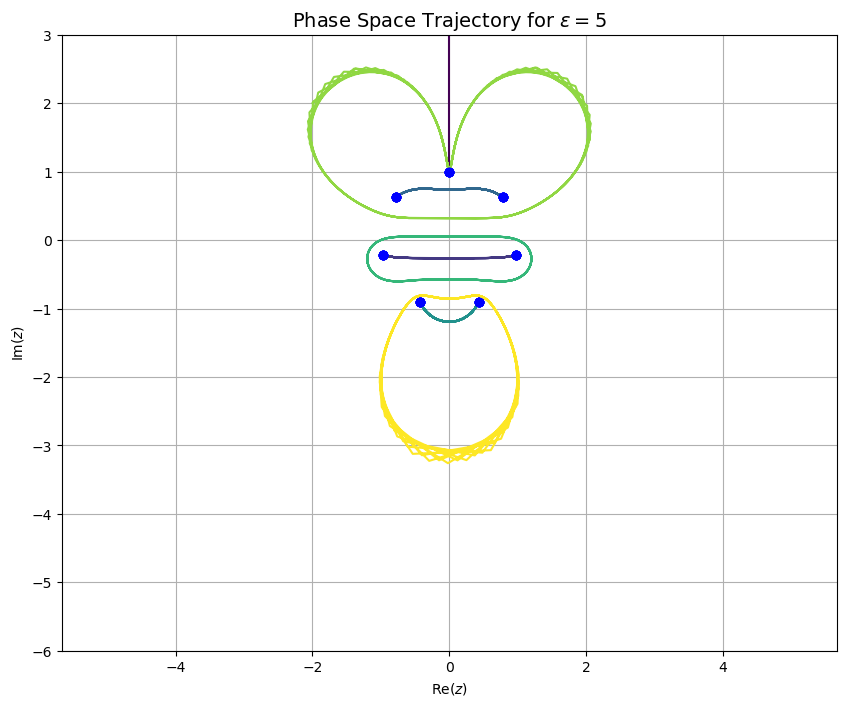

In [9]:
# Define the ODE system (real and imaginary parts)
def dydt(t, state):
    x, y, u, w = state  # state = [Re(z), Im(z), Re(dot{z}), Im(dot{z})]
    dxdt = u  # Re(dot{z})
    dydt = w  # Im(dot{z})
    dudt = 84*x**5*y - 280*x**3*y**3 + 84*x*y**5  # Re(ddot{z})
    dwdt = -14*x**6 + 210*x**4*y**2 - 210*x**2*y**4 + 14*y**6 # Im(ddot{z})
    return [dxdt, dydt, dudt, dwdt]

# Define initial conditions (all satisfying E = 1)
initial_conditions = [
    {"z0": 1.0j, "v0": 0.0},  # Turning point 1
    {"z0":-np.cos(np.pi/14) +  -np.sin(np.pi/14)*1.0j, "v0": 0.0},  # Turning point 2
    {"z0":np.cos(3*np.pi/14) +  np.sin(3*np.pi/14)*1.0j, "v0": 0.0},  # Turning point 3
    {"z0":-np.sin(np.pi/7) +  -np.cos(np.pi/7)*1.0j, "v0": 0.0},  # Turning point 4
    {"z0": 1.0, "v0": 2*np.sqrt(1-1.0j)}, 
    {"z0": -2.0+2.0j, "v0": 2*np.sqrt(-1023+1024.0j)}, 
    {"z0": -1.0-2.0j, "v0": 2*np.sqrt(-277+29j)},
]

# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Solve for each IC and store trajectories
solutions = []
for ic in initial_conditions:
    z0 = ic["z0"]
    v0 = ic["v0"]
    y0 = [np.real(z0), np.imag(z0), np.real(v0), np.imag(v0)]
    sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)
    solutions.append(sol)

# Plot phase space (Re(z) vs Im(z)) for all trajectories
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

for i, sol in enumerate(solutions):
    x = sol.y[0]  # Re(z)
    y = sol.y[1]  # Im(z)
    plt.plot(x, y, color=colors[i])
    plt.plot(0, 1, 'bo')  # Turning point
    plt.plot(-np.cos(np.pi/14), -np.sin(np.pi/14), 'bo')
    plt.plot(np.cos(np.pi/14), -np.sin(np.pi/14), 'bo')
    plt.plot(np.cos(3*np.pi/14), np.sin(3*np.pi/14), 'bo')
    plt.plot(-np.cos(3*np.pi/14), np.sin(3*np.pi/14), 'bo')
    plt.plot(-np.sin(np.pi/7), -np.cos(np.pi/7), 'bo')
    plt.plot(np.sin(np.pi/7), -np.cos(np.pi/7), 'bo')



plt.xlabel('Re($z$)')
plt.ylabel('Im($z$)')
plt.title('Phase Space Trajectory for $\epsilon = 5$', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.ylim(-6, 3)
plt.show()

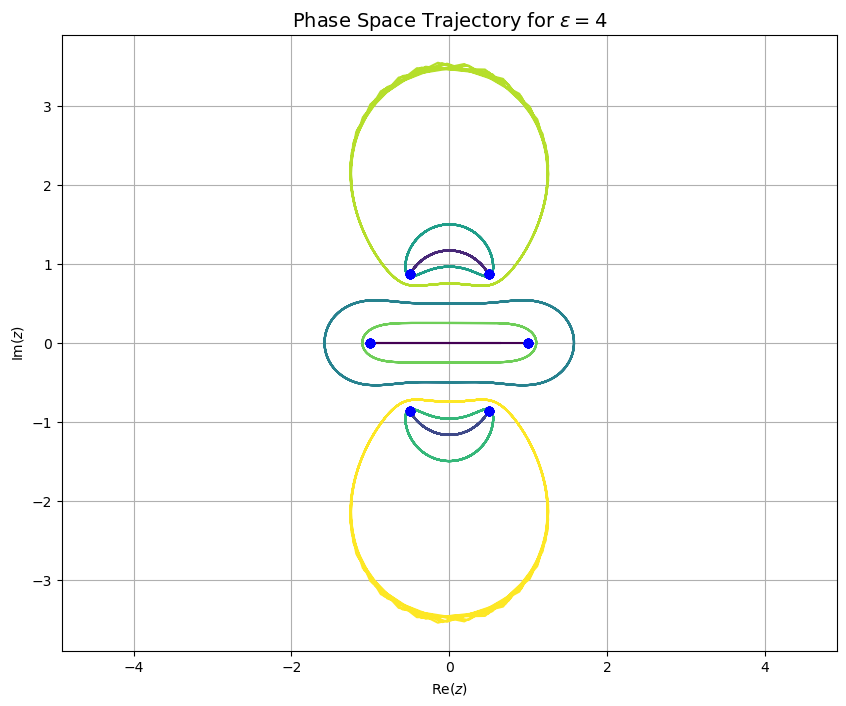

In [10]:
# Define the ODE system (real and imaginary parts)
def dydt(t, state):
    x, y, u, w = state  # state = [Re(z), Im(z), Re(dot{z}), Im(dot{z})]
    dxdt = u  # Re(dot{z})
    dydt = w  # Im(dot{z})
    dudt = 12*x*(-x**4 + 10*x**2*y**2 - 5*y**4) # Re(ddot{z})
    dwdt = 12*y*(-5*x**4 + 10*x**2*y**2 - y**4) # Im(ddot{z})
    return [dxdt, dydt, dudt, dwdt]

# Define initial conditions (all satisfying E = 1)
initial_conditions = [
    {"z0": 1, "v0": 0.0},  # Turning point 1
    {"z0": 1/2 + (np.sqrt(3)/2)*(1.0j), "v0": 0.0},  # Turning point 2
    {"z0": 1/2 - (np.sqrt(3)/2)*(1.0j), "v0": 0.0},  # Turning point 3 
    {"z0": 0.5j, "v0": 2*1.0077822185373187065458266537879713913917995382010716734920740486579},             
    {"z0": -0.5j, "v0": 2*1.0077822185373187065458266537879713913917995382010716734920740486579},          
    {"z0": 1.5j, "v0": 2*3.5200319600821808447434162371578663899150303533046811300054035878862},  
    {"z0": -1.5j, "v0": 2*3.5200319600821808447434162371578663899150303533046811300054035878862},  
    {"z0": 0.25j, "v0": 2*1.0001220628628287590237793057511238969434847618170095249890786233536}, 
    {"z0": 0.75j, "v0": 2*1.0853471866757659772212927375803558147904213564318540099590943996882},   
    {"z0": -0.75j, "v0": 2*1.0853471866757659772212927375803558147904213564318540099590943996882},   
]

# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Solve for each IC and store trajectories
solutions = []
for ic in initial_conditions:
    z0 = ic["z0"]
    v0 = ic["v0"]
    y0 = [np.real(z0), np.imag(z0), np.real(v0), np.imag(v0)]
    sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)
    solutions.append(sol)

# Plot phase space (Re(z) vs Im(z)) for all trajectories
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

for i, sol in enumerate(solutions):
    x = sol.y[0]  # Re(z)
    y = sol.y[1]  # Im(z)
    plt.plot(x, y, color=colors[i])
    plt.plot(1, 0, 'bo')  # Turning point
    plt.plot(-1, 0, 'bo')  # Turning point
    plt.plot(-1/2, -np.sqrt(3)/2, 'bo')  # Turning point
    plt.plot(1/2, np.sqrt(3)/2, 'bo')  # Turning point
    plt.plot(1/2, -np.sqrt(3)/2, 'bo')  # Turning point
    plt.plot(-1/2, np.sqrt(3)/2, 'bo')  # Turning point



plt.xlabel('Re($z$)')
plt.ylabel('Im($z$)')
plt.title('Phase Space Trajectory for $\epsilon = 4$', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.show()

In [11]:
import sympy as sp

# Define symbols
x, y = sp.symbols('x y', real=True)
z = x + sp.I * y
eps_values = [0, 1, 2, 3, 4, 5, 6]

for eps in eps_values:
    print(f"\nFor ε = {eps}:")
    # Compute (i z)^{1 + ε}
    iz = sp.I * z
    iz_pow = iz ** (1 + eps)
    
    # Compute \ddot{z} = 2i (2 + ε) (i z)^{1 + ε}
    ddot_z = 2 * sp.I * (2 + eps) * iz_pow
    
    # Expand and simplify
    ddot_z_expanded = sp.expand(ddot_z)
    print("Expanded form:")
    print(ddot_z_expanded)
    
    # Separate into real and imaginary parts
    re_part = sp.re(ddot_z_expanded)
    im_part = sp.im(ddot_z_expanded)
    print("\nReal part (Re(\\ddot{z})):")
    print(sp.simplify(re_part))
    print("Imaginary part (Im(\\ddot{z})):")
    print(sp.simplify(im_part))


For ε = 0:
Expanded form:
-4*x - 4*I*y

Real part (Re(\ddot{z})):
-4*x
Imaginary part (Im(\ddot{z})):
-4*y

For ε = 1:
Expanded form:
-6*I*x**2 + 12*x*y + 6*I*y**2

Real part (Re(\ddot{z})):
12*x*y
Imaginary part (Im(\ddot{z})):
-6*x**2 + 6*y**2

For ε = 2:
Expanded form:
8*x**3 + 24*I*x**2*y - 24*x*y**2 - 8*I*y**3

Real part (Re(\ddot{z})):
8*x*(x**2 - 3*y**2)
Imaginary part (Im(\ddot{z})):
8*y*(3*x**2 - y**2)

For ε = 3:
Expanded form:
10*I*x**4 - 40*x**3*y - 60*I*x**2*y**2 + 40*x*y**3 + 10*I*y**4

Real part (Re(\ddot{z})):
40*x*y*(-x**2 + y**2)
Imaginary part (Im(\ddot{z})):
10*x**4 - 60*x**2*y**2 + 10*y**4

For ε = 4:
Expanded form:
-12*x**5 - 60*I*x**4*y + 120*x**3*y**2 + 120*I*x**2*y**3 - 60*x*y**4 - 12*I*y**5

Real part (Re(\ddot{z})):
12*x*(-x**4 + 10*x**2*y**2 - 5*y**4)
Imaginary part (Im(\ddot{z})):
12*y*(-5*x**4 + 10*x**2*y**2 - y**4)

For ε = 5:
Expanded form:
-14*I*x**6 + 84*x**5*y + 210*I*x**4*y**2 - 280*x**3*y**3 - 210*I*x**2*y**4 + 84*x*y**5 + 14*I*y**6

Real part (Re(

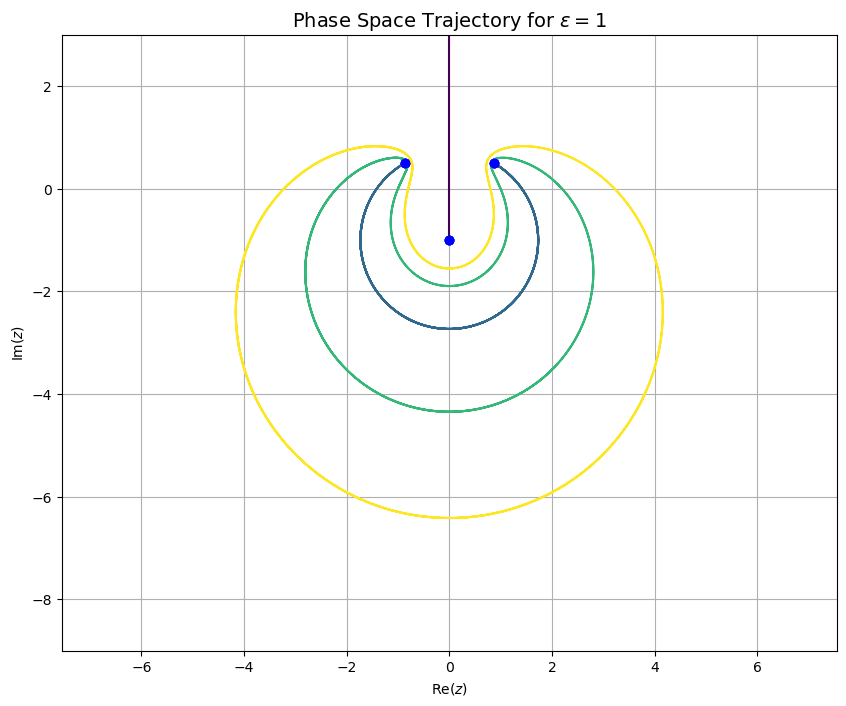

In [12]:
# Define the ODE system (real and imaginary parts)
def dydt(t, y):
    x, y, u, w = y  # y = [Re(z), Im(z), Re(\dot{z}), Im(\dot{z})]
    dxdt = u  # Real part of \dot{z}
    dydt = w  # Imaginary part of \dot{z}
    dudt = 12 * x * y # Re(\ddot{z}) = 12*x*y 
    dwdt = -6 * (x**2 - y**2)  # Im(\ddot{z}) = -6(x**2 - y**2)
    return [dxdt, dydt, dudt, dwdt]

# Define initial conditions (all satisfying E = 1)
initial_conditions = [
    {"z0": -1.0j, "v0": 0.0},      
    {"z0": 0.5 * np.sqrt(3) + 0.5j, "v0": 0},  
    {"z0": -1.0, "v0": 2*(np.sqrt(-1 + 1.0j))}, 
    {"z0": -0.8, "v0": 2*(0.248447 + 1.0304j)},
]

# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Solve for each IC and store trajectories
solutions = []
for ic in initial_conditions:
    z0 = ic["z0"]
    v0 = ic["v0"]
    y0 = [np.real(z0), np.imag(z0), np.real(v0), np.imag(v0)]
    sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)
    solutions.append(sol)

# Plot phase space (Re(z) vs Im(z)) for all trajectories
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

for i, sol in enumerate(solutions):
    x = sol.y[0]  # Re(z)
    y = sol.y[1]  # Im(z)
    plt.plot(x, y, color=colors[i])
    plt.plot(0, -1, 'bo')  # Turning point
    plt.plot(0.5*np.sqrt(3), 0.5, 'bo')  # Turning point
    plt.plot(-0.5*np.sqrt(3), 0.5, 'bo')  # Turning point

plt.xlabel('Re($z$)')
plt.ylabel('Im($z$)')
plt.title('Phase Space Trajectory for $\epsilon = 1$', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.ylim(-9, 3)
plt.show()

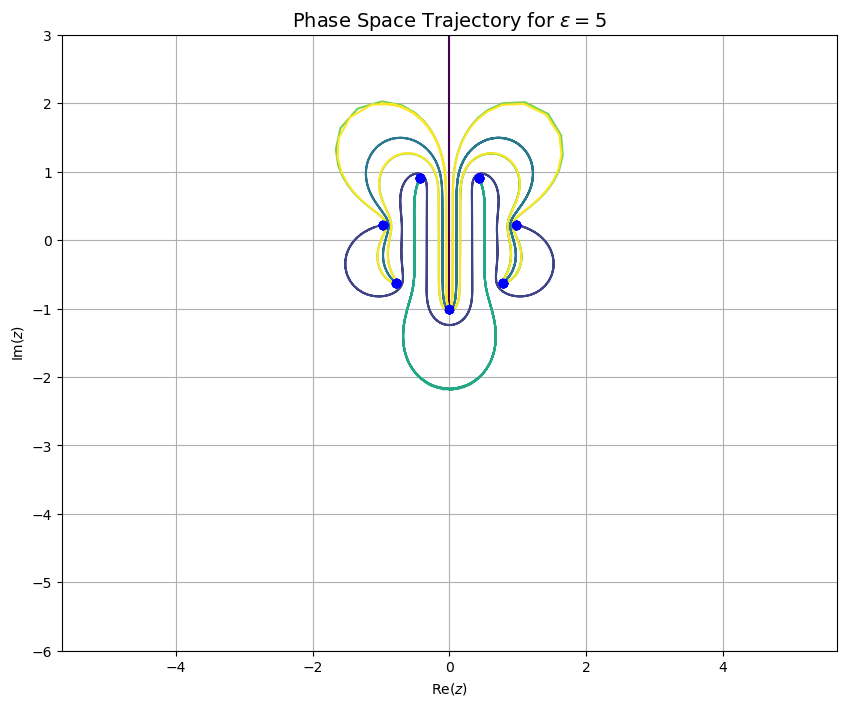

In [13]:
# Define the ODE system (real and imaginary parts)
def dydt(t, state):
    x, y, u, w = state  # state = [Re(z), Im(z), Re(dot{z}), Im(dot{z})]
    dxdt = u  # Re(dot{z})
    dydt = w  # Im(dot{z})
    dudt = 84*x**5*y - 280*x**3*y**3 + 84*x*y**5  # Re(ddot{z})
    dwdt = -14*x**6 + 210*x**4*y**2 - 210*x**2*y**4 + 14*y**6 # Im(ddot{z})
    return [dxdt, dydt, dudt, dwdt]

# Define initial conditions (all satisfying E = 1)
initial_conditions = [
    {"z0": -1.0j, "v0": 0.0},  # Turning point 1
    {"z0":-np.cos(np.pi/14) + np.sin(np.pi/14)*1.0j, "v0": 0.0},  # Turning point 2
    {"z0":np.cos(3*np.pi/14) -  np.sin(3*np.pi/14)*1.0j, "v0": 0.0},  # Turning point 3
    {"z0":-np.sin(np.pi/7) + np.cos(np.pi/7)*1.0j, "v0": 0.0},  # Turning point 4
    {"z0": 1.0, "v0": 2*(0.45509 - 1.09868j)}, 
    {"z0": -1.0+ 2.0j, "v0": 2*np.sqrt(277+29j)},
]

# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Solve for each IC and store trajectories
solutions = []
for ic in initial_conditions:
    z0 = ic["z0"]
    v0 = ic["v0"]
    y0 = [np.real(z0), np.imag(z0), np.real(v0), np.imag(v0)]
    sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)
    solutions.append(sol)

# Plot phase space (Re(z) vs Im(z)) for all trajectories
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

for i, sol in enumerate(solutions):
    x = sol.y[0]  # Re(z)
    y = sol.y[1]  # Im(z)
    plt.plot(x, y, color=colors[i])
    plt.plot(0, -1, 'bo')  # Turning point
    plt.plot(-np.cos(np.pi/14), np.sin(np.pi/14), 'bo')
    plt.plot(np.cos(np.pi/14), np.sin(np.pi/14), 'bo')
    plt.plot(np.cos(3*np.pi/14), -np.sin(3*np.pi/14), 'bo')
    plt.plot(-np.cos(3*np.pi/14), -np.sin(3*np.pi/14), 'bo')
    plt.plot(-np.sin(np.pi/7), np.cos(np.pi/7), 'bo')
    plt.plot(np.sin(np.pi/7), np.cos(np.pi/7), 'bo')



plt.xlabel('Re($z$)')
plt.ylabel('Im($z$)')
plt.title('Phase Space Trajectory for $\epsilon = 5$', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.ylim(-6, 3)
plt.show()